In [1]:
import os
import numpy as np
import cv2
from PIL import Image

C:\Users\HP\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import tensorflow as tf

In [3]:
image_path = r"E:\BTC Market Project\cifar-10\images\train\2.png"

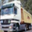

In [4]:
truck_image = Image.open(image_path)
truck_image

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



In [7]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# train_images

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


Epoch 1/20
1563/1563 [==============================] - 35s 19ms/step - loss: 1.4768 - accuracy: 0.4604 - val_loss: 1.3054 - val_accuracy: 0.5379
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1180 - accuracy: 0.6058 - val_loss: 1.0640 - val_accuracy: 0.6243
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9713 - accuracy: 0.6590 - val_loss: 1.0765 - val_accuracy: 0.6256
Epoch 4/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8742 - accuracy: 0.6933 - val_loss: 0.9005 - val_accuracy: 0.6866
Epoch 5/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8036 - accuracy: 0.7182 - val_loss: 0.9526 - val_accuracy: 0.6755
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7401 - accuracy: 0.7386 - val_loss: 0.8416 - val_accuracy: 0.7119
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6881 - accuracy: 0.7585 - val_loss: 0.8803 -

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 3s - loss: 1.2836 - accuracy: 0.7046 - 3s/epoch - 8ms/step

Test accuracy: 0.7045999765396118


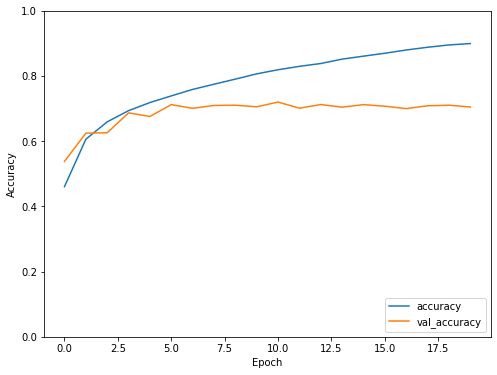

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [14]:
# Convert the logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Make predictions on test images
predictions = probability_model.predict(test_images)

# Show the first prediction
print(predictions[0])


313/313 [==============================] - 2s 7ms/step
[1.2185551e-07 5.8515747e-05 1.9380487e-07 8.6588460e-01 2.3118731e-07
 8.5588567e-02 8.9577475e-07 4.6035617e-05 4.8158817e-02 2.6197295e-04]


In [15]:
model.save('cifar10_model.h5')

In [16]:
from tensorflow.keras.models import load_model

model = load_model('cifar10_model.h5')

In [17]:
# train_images

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

313/313 [==============================] - 3s 8ms/step - loss: 1.2836 - accuracy: 0.7046
Test accuracy: 0.70
